## Compose N-gram corpora whose word satisfy double power-law.

In [30]:
import random 
import bisect 
import math 
from functools import reduce
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from count import *
from zipfgen import ZipfGenerator
%matplotlib inline

In [31]:
def read_file_generate_fake(char_num = 2, out_file =  'fake1.txt', sample_word_num = 8000,
                            num_word_in_fake_scrip = 15000, 
                            alpha = 1.00001, alpha2 = 1.001, noun = False):
    """Read "roc2.txt" file, and then generate a fake script satisfying Zipfs' law. All the words in 
    the output script share the same lenth char_num
    """
    SAMPLE_WORD_NUM = sample_word_num
    ALPHA = alpha
    ALPHA2 = alpha2
    NUM_WORD_IN_NOV = num_word_in_fake_scrip
    OUTPUT_FILE_NAME = out_file
    NOUN = noun
    CHAR_NUM = char_num
    
    zipf_gen_1 =  ZipfGenerator(SAMPLE_WORD_NUM,ALPHA)
    zipf_gen_2 =  ZipfGenerator(SAMPLE_WORD_NUM,ALPHA2)
    f =  open("roc2.txt","r", encoding = 'utf8')

    world_list = []
    
    for line in f:
        line_split = line.split('\t')
        if NOUN:
            if 'N' in line_split[4]:
                world_list.append(line_split[3])
        else:
            #if len(line_split[3]) == CHAR_NUM:
                world_list.append(line_split[3])

    f.close()
    
    for item in world_list:
        if item == " ":
            world_list.remove(item)
    #######################################
    #######these codes are optional######## 
    
    tmp_list = []
    for item in world_list:
        for e in list(item):
            tmp_list.append(e)
    random.shuffle(tmp_list)
    list_2 = []
    tmp = ''
    for e in tmp_list:
        tmp = tmp + e
        if len(tmp) == char_num:
            list_2.append(tmp)
            tmp = ''
    
    world_list = list_2

    print("words in a corpus: " ,len(world_list))
    
    ###########optional codes end##########
    #######################################


    print("A corpus is successfully loaded.")
    
    random.shuffle(world_list)
    small_world_list_1 = world_list[-SAMPLE_WORD_NUM:]
    random.shuffle(world_list)
    small_world_list_2 = world_list[-SAMPLE_WORD_NUM:]
    target_string_list = []

    for i in range(NUM_WORD_IN_NOV):
        if i % 2 == 0: 
            num = zipf_gen_1.next()
            w = small_world_list_1[num]
        else: 
            num = zipf_gen_2.next()
            w = small_world_list_2[num]                
        
        target_string_list.append(w+" ")
        
    f2 = open(OUTPUT_FILE_NAME , 'w', encoding='utf8')

    word_count = 0
    for item in target_string_list:
        if word_count < 20:
            f2.write(item)
            word_count += 1
        else:
            word_count = 0
            f2.write(item+"\n")
    f2.close()
    print("A fake script is successfully created !")
    print("--------------------")
    return None

## Change your parameters
* char_num: char-gram. It decide the number of characters in single word. (假文本裡面每個單詞的字數)
* out_file: name of your out-put fake corpus. (輸出的假文本的檔名)
* sample_word_num: parameter of double power-law 
* num_word_in_fake_scrip: number of word in fake corpus
* alpha1: parameter of double power-law
* alpha2: parameter of double power-law
* noun: True/False, if you only chose nouns in roc2.txt (Sinica corpus) to generate fake corpus.

In [32]:
filename = 'DPL.txt' 
ALPHA = 1.6001
ALPHA2 = 1.5501

read_file_generate_fake(char_num = 2, out_file =  filename, sample_word_num = 8000, num_word_in_fake_scrip = 200000, alpha = ALPHA, alpha2 = ALPHA2, noun = False)

words in a corpus:  32439
A corpus is successfully loaded.
A fake script is successfully created !
--------------------


read file successfully!
Successfully count word freqency!
Successfully count char freqency!
Successfully build data frames!


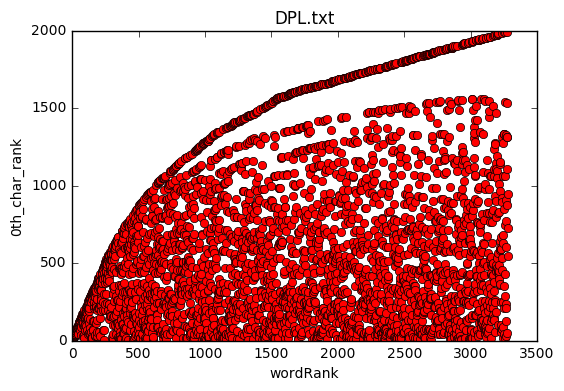

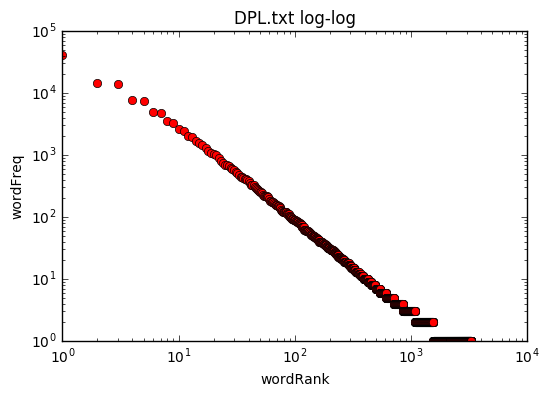

In [33]:
#encode = "UTF-16" #(1)
encode = "UTF-8"   #(2)
##if anything gets into trouble, use (1) instead of (2), and vise versa.

big, char, word = main(filename,encode) 
draw(big,title = filename)